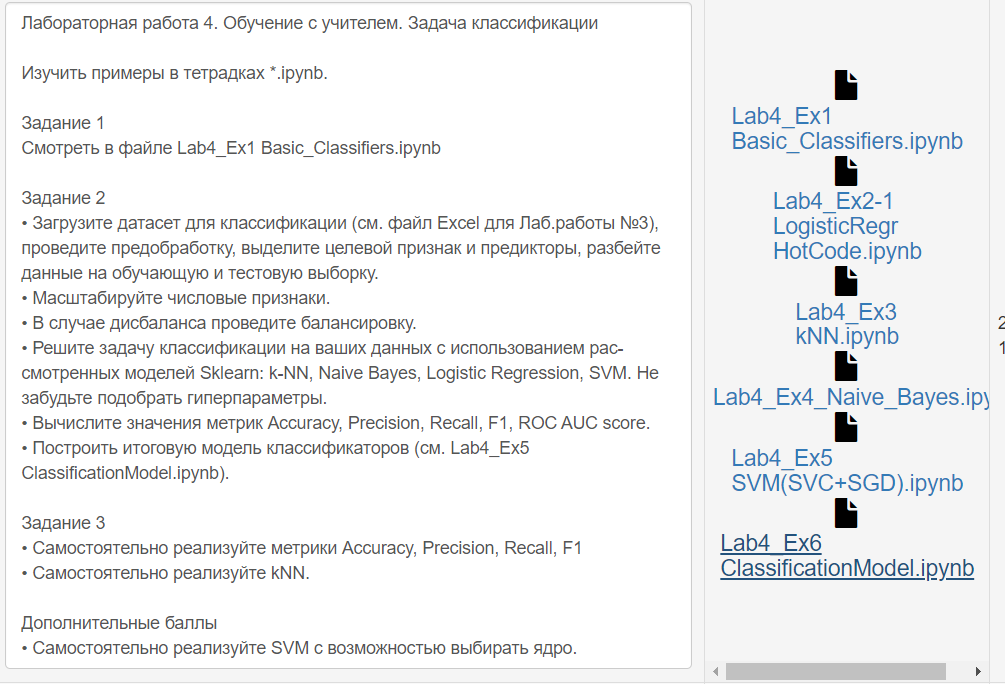

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, RocCurveDisplay, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from math import sqrt
import matplotlib.pyplot as plt

# Задание 1



Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?

```
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
```
$P(stroll|raining) =\frac{P(stroll) \cdot P(raining | stroll)}{P(raining)}$

In [2]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

df_task1 = pd.DataFrame(data, columns=["weather", "stroll"])

p_stroll = len(df_task1[df_task1["stroll"] == True]) / len(df_task1)
p_raining_if_stroll = len(df_task1[(df_task1["stroll"] == True) & (df_task1["weather"] == "дождь")]) / len(df_task1[df_task1["stroll"] == True])
p_raining = len(df_task1[df_task1["weather"] == "дождь"]) / len(df_task1)

p_stroll_if_raining = p_stroll * p_raining_if_stroll / p_raining
p_stroll_if_raining

0.3333333333333333

# Задание 2

## Предобработка, разбиение на обучающую и тестовую выборки.

In [3]:
df = pd.read_csv(r"..\data\Lab4\diabetes_012_health_indicators_BRFSS2015.csv")
pd.set_option('display.max_columns', None)
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

<font size=20>
Ура, пропусков нет!!!

Проверим дисбаланс классов.

In [5]:
y = df["Diabetes_012"]
y.unique()

array([0., 2., 1.])

In [6]:
for unique in y.unique():
    print(unique, y.loc[y == unique].count())

0.0 213703
2.0 35346
1.0 4631


Наблюдается сильный дисбаланс. Применим DownSampling.

In [7]:
df_major_0 = df[df["Diabetes_012"] == 0]  # smote
df_major_2 = df[df["Diabetes_012"] == 2]
df_minor_1 = df[df["Diabetes_012"] == 1]

df_major_0_undersampled = df_major_0.sample(len(df_minor_1))
df_major_2_undersampled = df_major_2.sample(len(df_minor_1))

# Сбалансированный df
df = pd.concat([df_major_0_undersampled, df_major_2_undersampled, df_minor_1], axis=0)

y = df["Diabetes_012"]
for unique in y.unique():
    print(unique, y.loc[y == unique].count())

0.0 4631
2.0 4631
1.0 4631


После балансировки классов количество наблюдений существенно уменьшилось, однако этого должно быть достаточно.

Масштабируем данные.

In [8]:
maybe_normal = [
    'BMI',
    'GenHlth',
    'MentHlth', 
    'PhysHlth',
    'Age', 
    'Education',
    'Income',
]

other = list(set(df.columns) - set(maybe_normal))

Проверим некоторые столбцы на нормальность распределения данных.

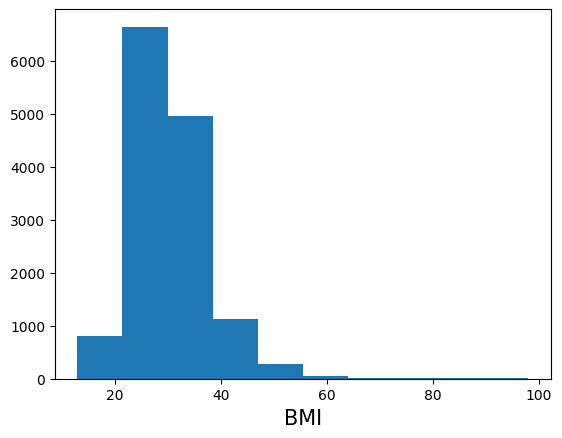

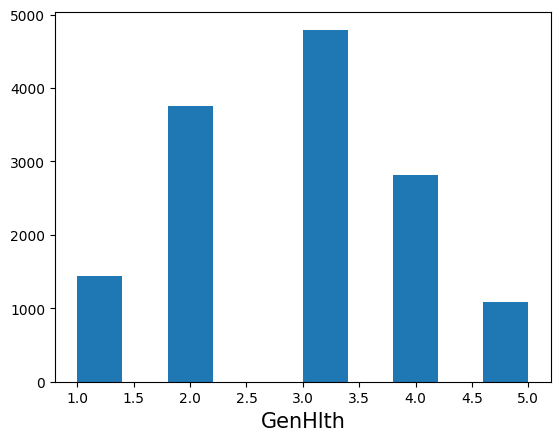

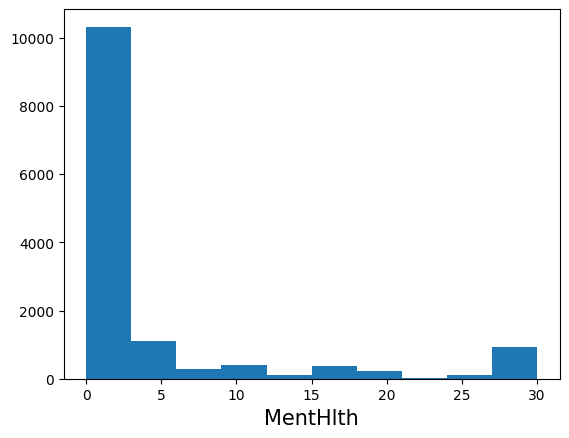

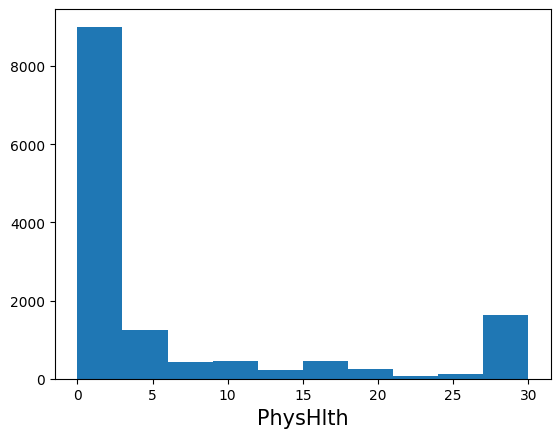

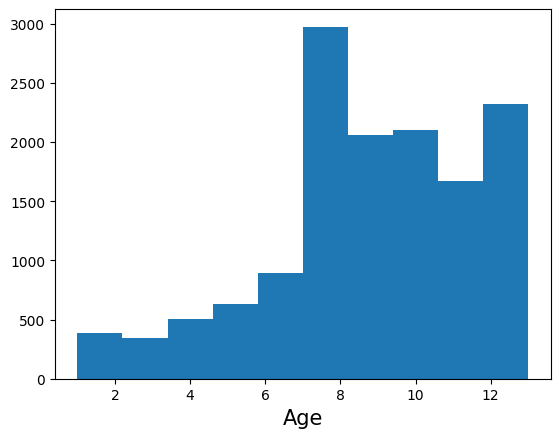

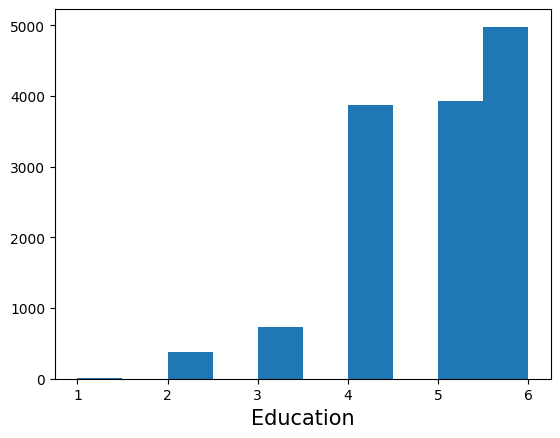

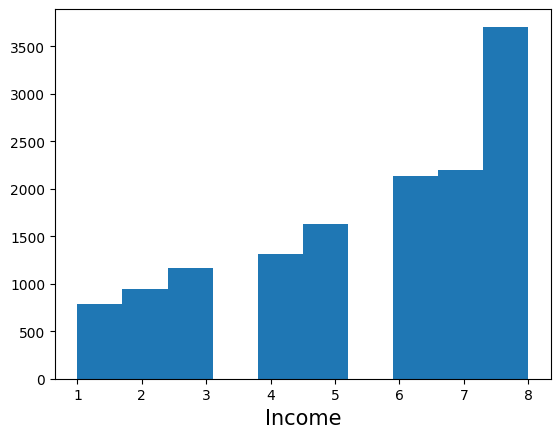

In [9]:
for column in maybe_normal:
    plt.hist(df[column])
    plt.xlabel(column, fontdict={"size": 15})
    plt.show()

In [10]:
columns = list(df.columns)
columns.remove('Diabetes_012')

Нормальным можно назвать только распределение столбца GenHlth, поэтому масштабируем все признаки с помощью MinMaxScaler.

In [11]:
minmax = MinMaxScaler()

df_for_minmax = df.drop(["Diabetes_012"], axis=1)
x = pd.DataFrame(minmax.fit_transform(df_for_minmax), columns=columns)

Разделим данные на обучающую и тестовую выборки и приступим к обучению.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

## KNN

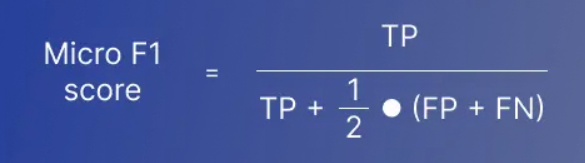

In [13]:
param_grid = {
    "n_neighbors": [90, 95, 100, 105, 110, 115, 120],
    "p": [1, 2],
}

gridseach = GridSearchCV(KNeighborsClassifier(weights="distance", metric="minkowski"), param_grid=param_grid, scoring="f1_micro")
gridseach.fit(x_train, y_train)
gridseach.best_params_


{'n_neighbors': 100, 'p': 1}

In [14]:
knn = KNeighborsClassifier(n_neighbors=100, metric='minkowski', p=2, weights="distance")
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.63      0.60      1389
         1.0       0.42      0.27      0.33      1390
         2.0       0.47      0.58      0.52      1389

    accuracy                           0.50      4168
   macro avg       0.49      0.50      0.48      4168
weighted avg       0.49      0.50      0.48      4168



ROC AUC score.

In [15]:
y_pred_probabityties = knn.predict_proba(x_test)
roc_auc_score(y_test, y_pred_probabityties, multi_class="ovo")

0.6845087815384142

## Naive Bayes

In [16]:
# Априорные вероятности пусть посчитает сам.
gauss_bayes = GaussianNB()
gauss_bayes.fit(x_train, y_train)

y_pred = gauss_bayes.predict(x_test)
y_pred_probabityties = gauss_bayes.predict_proba(x_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.70      0.59      1389
         1.0       0.43      0.13      0.20      1390
         2.0       0.48      0.64      0.55      1389

    accuracy                           0.49      4168
   macro avg       0.47      0.49      0.45      4168
weighted avg       0.47      0.49      0.45      4168



In [18]:
roc_auc_score(y_test, y_pred_probabityties, multi_class="ovo")

0.6843393444353344

## Logistic Regression

In [19]:
logreg = LogisticRegression(max_iter=900)  # Алгоритм не сходился, поэтому увеличил итерации

gridsearch = GridSearchCV(logreg, {"C": np.arange(0.1, 1.1, 0.1)}, scoring="f1_micro")
gridsearch.fit(x_train, y_train).best_params_

{'C': 1.0}

In [20]:
logreg = LogisticRegression(max_iter=900, C=0.3)
y_pred = logreg.fit(x_train, y_train).predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.65      0.62      1389
         1.0       0.44      0.30      0.35      1390
         2.0       0.49      0.60      0.54      1389

    accuracy                           0.52      4168
   macro avg       0.51      0.52      0.50      4168
weighted avg       0.51      0.52      0.50      4168



In [21]:
y_pred_probabityties = logreg.predict_proba(x_test)

roc_auc_score(y_test, y_pred_probabityties, multi_class="ovo")

0.7053942473296452

## SVM

In [22]:
svc = SVC()

param_grid = {
    "C": np.arange(0.1, 0.5, 1),
    "kernel": ("linear", "poly", "rbf"),
    "degree": (2, 3, 4),  
}

gridsearch = GridSearchCV(svc, param_grid, scoring="f1_micro")
gridsearch.fit(x_train, y_train).best_params_

{'C': 0.1, 'degree': 2, 'kernel': 'poly'}

In [23]:
svc = SVC(C=0.1, kernel="poly", degree=2, probability=True)
svc.fit(x_train, y_train)                                      
y_pred = svc.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61      1389
         1.0       0.42      0.23      0.30      1390
         2.0       0.46      0.67      0.55      1389

    accuracy                           0.51      4168
   macro avg       0.50      0.51      0.49      4168
weighted avg       0.50      0.51      0.49      4168



In [24]:
y_pred_probabityties = svc.predict_proba(x_test)
roc_auc_score(y_test, y_pred_probabityties, multi_class="ovo")

0.697478135959854

## Итоговая модель классификаторов 

In [25]:
classifiers = {
    'Logistic Regression': LogisticRegression(C=0.4),
    'KNN classifier': KNeighborsClassifier(n_neighbors=105, metric='minkowski', p=1, weights="distance"),
    'Naive Bayes': GaussianNB(),
    'SVC': SVC(C=0.1, kernel="linear", probability=True)
}


for name, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

    print(name)
    print(classification_report(y_test,y_pred), "\n\n")

Logistic Regression
              precision    recall  f1-score   support

         0.0       0.60      0.65      0.62      1389
         1.0       0.44      0.30      0.36      1390
         2.0       0.49      0.60      0.54      1389

    accuracy                           0.52      4168
   macro avg       0.51      0.52      0.51      4168
weighted avg       0.51      0.52      0.51      4168
 


KNN classifier
              precision    recall  f1-score   support

         0.0       0.57      0.64      0.60      1389
         1.0       0.42      0.27      0.33      1390
         2.0       0.47      0.58      0.52      1389

    accuracy                           0.50      4168
   macro avg       0.49      0.50      0.48      4168
weighted avg       0.49      0.50      0.48      4168
 


Naive Bayes
              precision    recall  f1-score   support

         0.0       0.51      0.70      0.59      1389
         1.0       0.43      0.13      0.20      1390
         2.0       0.4

# Зaдание 3

Accuracy, precision, recall, f1. <newline>

Confusion Matrix в sklearn не такая, как на картинке в блокноте, она тут транспонированная, поэтому precision считается как recall, а recall - как precision.

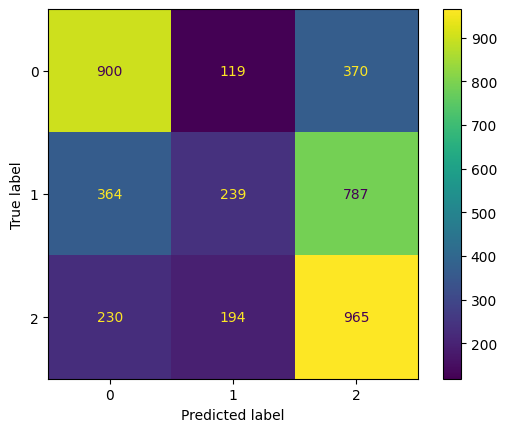

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [27]:
from numpy.typing import ArrayLike, NDArray
from numpy import trace
from typing import List

def accuracy(confusion_matrix: NDArray) -> float:
    return trace(confusion_matrix) / np.sum(confusion_matrix, axis=(0, 1))


def precision(confusion_matrix: NDArray) -> List[float]:
    res = []
    for i in range(len(confusion_matrix[0])):
        res.append(
            confusion_matrix[i][i] / sum(confusion_matrix[:, i])
        )
    return res


def recall(confusion_matrix: NDArray) -> List[float]:
    res = []
    for i in range(len(confusion_matrix[0])):
        res.append(
            confusion_matrix[i][i] / sum(confusion_matrix[i])
        )
    return res
    


def f_score(confusion_matrix: NDArray) -> List[float]:
    res = []
    _precision = precision(confusion_matrix)
    _recall = recall(confusion_matrix)

    for i in range(len(confusion_matrix[0])):
        res.append(
            2 / (1 / _precision[i] + 1 / _recall[i])
        )
    return res


def report(confusion_matrix: NDArray) -> str:
    a = round(accuracy(confusion_matrix), 2)
    p = np.around(precision(confusion_matrix), 2)
    r = np.around(recall(confusion_matrix), 2)
    f = np.around(f_score(confusion_matrix), 2)

    res = "Precision: \t"
    number_of_columns = len(p)
    for i in range(number_of_columns):
        res += str(p[i]) + "\t"
    res += "\n" + "Recall: \t"

    for i in range(number_of_columns):
        res += str(r[i]) + "\t"
    res += "\n" + "f_score: \t"

    for i in range(number_of_columns):
        res += str(f[i]) + "\t"
    res += "\n"

    res += "Accuracy: \t" + str(a)
    return res


print(report(cm))

Precision: 	0.6	0.43	0.45	
Recall: 	0.65	0.17	0.69	
f_score: 	0.62	0.25	0.55	
Accuracy: 	0.5


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.65      0.62      1389
         1.0       0.43      0.17      0.25      1390
         2.0       0.45      0.69      0.55      1389

    accuracy                           0.50      4168
   macro avg       0.50      0.50      0.47      4168
weighted avg       0.50      0.50      0.47      4168



## KNN

In [29]:
from typing import Tuple, Any
from scipy.stats import mode

class KNNClassifier:
    def __init__(self, x_train: pd.DataFrame, y_train: pd.Series, k_neighbors: int) -> None:
        self.x_train = x_train.to_numpy()
        self.y_train = y_train.array
        self.k_neighbors = k_neighbors

    def predict(self, x_test: pd.DataFrame) -> List[Any]:  # Возвращать должна список присвоенных меток классов
        res_classes = []
        for _, test_row in x_test.iterrows():
            distances_classes: List[Tuple[float, int]] = []  # Tuple(distance, class)

            
            for index, train_row in enumerate(self.x_train):
                sum = 0

                for i, test_element in enumerate(test_row):
                    sum += (test_element - train_row[i]) ** 2

                distances_classes.append(
                    (sqrt(sum), self.y_train[index])
                )

            distances_classes.sort(key=lambda tuple: tuple[0])
            neighbors = distances_classes[:self.k_neighbors]
            _class = mode(np.array(neighbors)[:, 1]).mode
            res_classes.append(_class)

        return res_classes

In [30]:
knn = KNNClassifier(x_train.iloc[:500], y_train.iloc[:500], 10)
y_pred = knn.predict(x_test.iloc[:200])

C:\Users\Halim\AppData\Local\Temp\ipykernel_13500\70889909.py:28: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  _class = mode(np.array(neighbors)[:, 1]).mode


In [31]:
print(classification_report(y_test.iloc[:200], y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.59      0.53        69
         1.0       0.38      0.36      0.37        69
         2.0       0.40      0.31      0.35        62

    accuracy                           0.42       200
   macro avg       0.42      0.42      0.41       200
weighted avg       0.42      0.42      0.42       200

